**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("./Task 1 Data set/cleaned_data.csv")

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [8]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [11]:
grid_values = {'n_estimators':[10,50,100,200],'max_depth':[3,6,9,12]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [14]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(rf, param_grid = grid_values,verbose=2)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [15]:
grid_clf.fit(X_train, y_train)
y_decision_scores = grid_clf.predict(X_test)
print(y_decision_scores)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] .

[CV] .................... max_depth=9, n_estimators=200, total=   5.8s
[CV] max_depth=9, n_estimators=200 ...................................
[CV] .................... max_depth=9, n_estimators=200, total=   5.8s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.4s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.4s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.4s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.4s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.4s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.0min finished


[1 1 0 ... 0 0 1]


___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [17]:
y_preds=pd.DataFrame(y_decision_scores)

**Find the best hyperparameters from the cross-validation.**

In [19]:
print('Grid best parameter (max. accuracy): ', grid_clf.best_params_)
print('Grid best score (accuracy): ', grid_clf.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 12, 'n_estimators': 200}
Grid best score (accuracy):  0.8207774511287191


________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [20]:
# Create a 5x5 grid
test_scores=[]
max_depth=[3,6,9,12]
n_estimators=[10,50,100,200]
#n=[1,5,10,15,20,35,40,45,50,60,70,100]
for i in n_estimators:
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i,max_depth=j).fit(X_train, y_train)
        a=clf.score(X_test,y_test)
        test_scores.append([i,j,a])

In [21]:
# Set color map to `plt.cm.jet`
colormap = plt.cm.jet

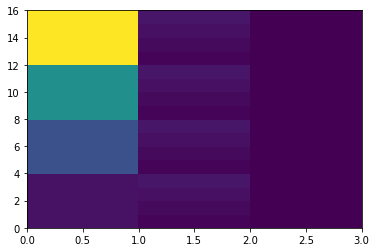

In [27]:
# Visualize pcolormesh
plt.pcolormesh(test_scores)

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [28]:
# Create a dataframe of the feature names and importance
df=pd.DataFrame(test_scores)

In [29]:
# Sort values by importance
sorted(test_scores, key=lambda score: score[2])

[[10, 3, 0.7956122257641103],
 [100, 3, 0.8085505344084005],
 [200, 3, 0.8106131633227077],
 [50, 3, 0.8108006750421901],
 [100, 12, 0.8184886555409713],
 [10, 12, 0.8192387024189012],
 [10, 9, 0.8194262141383837],
 [200, 12, 0.8198012375773486],
 [50, 12, 0.8199887492968311],
 [50, 6, 0.8205512844552785],
 [10, 6, 0.820738796174761],
 [200, 6, 0.8209263078942434],
 [100, 9, 0.8211138196137259],
 [100, 6, 0.8214888430526908],
 [200, 9, 0.8214888430526908],
 [50, 9, 0.8218638664916558]]